## Текст задания:
#### Для тестового задания предлагается рассчитать математическую модель следующей игры:
#### Дано поле 2x2, где случайным образом расположена 1 мина и 1 бонус.
#### Игрок открывает от 1 до 3 клеток, количество открываемых клеток остается на усмотрение игрока.
#### При открытии клетки с миной игра заканчивается проигрышем и игрок проигрывает сумму ставки.
#### При открытии обычных ячеек игрок увеличивает коэффициент выигрыша. После открытия хотя бы одной ячейки игрок может самостоятельно закончить игру, в таком случае ему выплатится сумма ставки, умноженная на коэффициент выигрыша. Если открыты 3 ячейки - игра заканчивается автоматически, с начислением суммы ставки, умноженной на коэффициент выигрыша.
#### Таким образом у игры есть 3 коэффициента: когда открыта одна ячейка k1, когда открыто 2 ячейки - k2, когда открыто 3 ячейки - k3.
#### При открытии клетки с бонусом игрок переходит на бонусный раунд с полем 2x2, но каждая клетка соответствует определенному коэффициенту (b1, b2, b3, b4). После открытия любой клетки бонусный раунд заканчивается и текущий коэффициент выигрыша игрока умножается на коэффициент клетки, открытой в бонусном раунде. После этого игрок может продолжить игру.
#### Задача: Подобрать коэффициенты k1, k2, k3, b1..4 так, чтобы математическое ожидание дохода игрока при ставке в 1 доллар было 0.9 доллара.


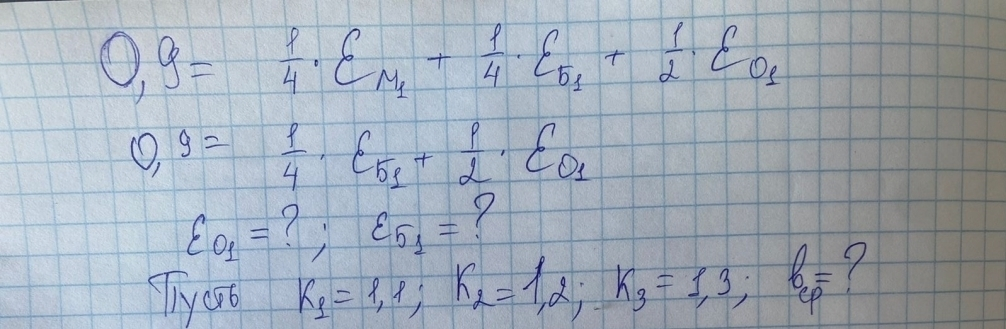

## Начну с того, какой логики я придерживался при решении: 
#### Во-первых, для удобства иметь дело с усреднённым бонусным коэффициентом b, а также заранее определить коэффициенты k1, k2 и k3, чтобы потом подобрать к ним подходящий b.
#### Во-вторых, разделить само "дерево" исходов на три ветви, в зависимости от первого хода: мина, обычная клетка, или бонусная. 
#### Далее, для каждой ветви вычислить оптимальное поведение игрока, таким образом реализовать возможность игрока покинуть игру в лучший момент.
#### Чтобы это сделать, на каждом ходу ветви будет проводиться сравнения матожидания: ухудшается или улучшается оно в зависимости от решения игрока.
#### В конце, за матожидание определённой ветви возьмём то поведение, которое дало наивысшее матожидание.
### Для начала положим b1 = 1.1, b2 = 1.2 и b3 = 1.3 и рассмотрим ветвь, где первым ходом игрок попал на бонусную клетку.

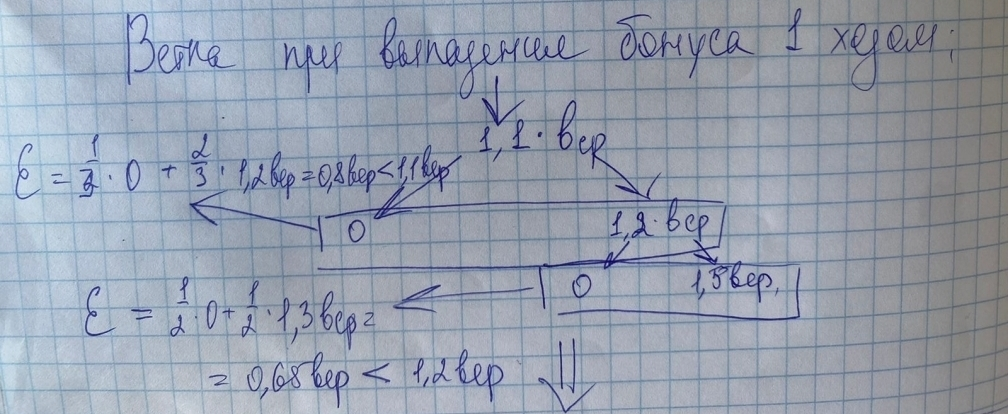

### Итак, при попадании на бонусную клетку мы уже имеем коэффициент 1.1, помноженный на b, наш усредненный бонусный коэффициент.
### Далее у нас есть 3 оставшихся поля: 2 обычных и 1 мина.
### При попадании на обычное поле мы будем иметь коэффициент 1.2 * b, а при попадании на мину мы взрываемся и остаёмся ни с чем.
### Таким образом, матожидание равно ноль + вероятность попадания на обычное поле * соответствующий коэффициент = 2/3 * 1.2 * b = 0.8 * b, что меньше изначального 1.1 * b.
### Напрашивается вывод: "оптимальное" поведение при выпадении бонуса первым ходом - уходить сразу.
### Следовательно, максимальное матожидание при данном исходе: 1.1 * b.
### Теперь посмотрим на ветку с первой обычной клеткой.

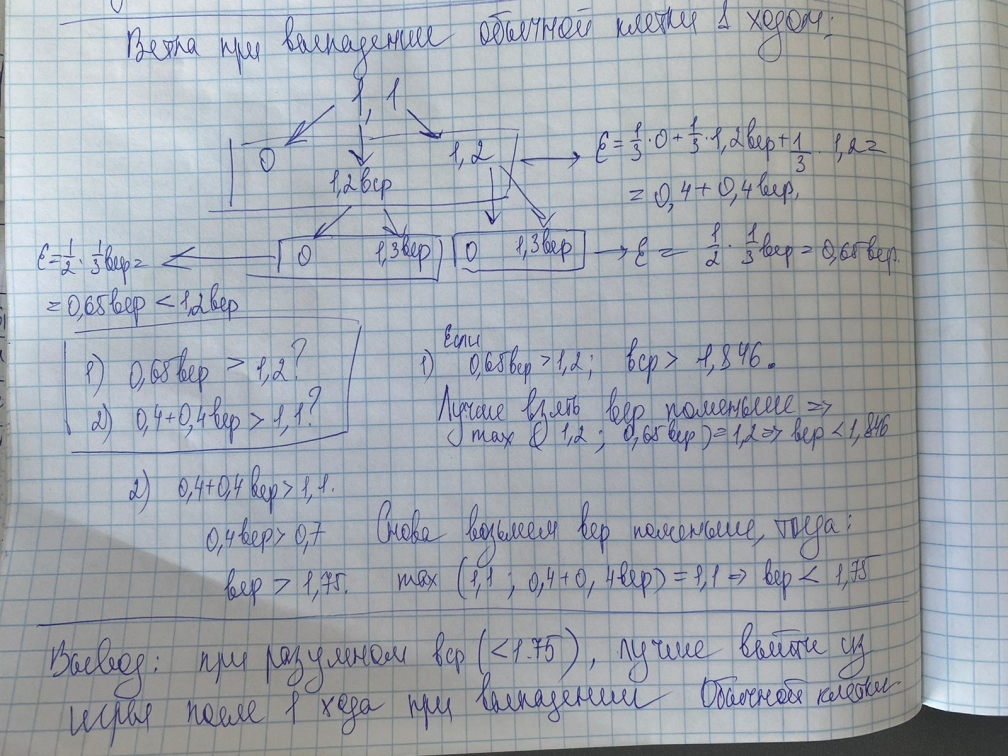

### При попадании на обычную клетку первым ходом, мы уже имеем 1.1, с ним и будем сверяться.
### Теперь у нас имеется 3 равновероятных исхода: мина, вторая обычная клетка и бонус.
### При попадании на мину мы обнуляемся, при попадании на обычную клетку мы имеем 1.2, а при попадании на бонус мы имеем 1.2 * b.
### Таким образом, матожидание у нас равно: 1/3 * 0 + 1/3 * 1.2 + 1/3 * 1.2 * b = 0.4 + 0.4 * b.
### Так как мы еще не знаем значение b, мы не можем сказать, что больше: 1.1 или 0.4 + 0.4 * b, так что капнём глубже.
### Если мы не попали на мину, то третьим ходом в обоих оставшихся случаях мы имеем одинаковое матожидание: 1/2 * 1.3 * b = 0.65 * b (поскольку с вероятностью 1/2 также можем подорваться на мине).
### И если при сравнении с "бонусной" веткой вопросов нет: 0.65 * b конечно же меньше 1.2 * b, то вот меньше ли 0.65 * b чем 1.2 мы снова не знаем.
### Таким образом, возникает система неравенств, где: 1) 0.65 * b < 1.2? и 2) 0.4 + 0.4 * b < 1.1?
### Раскрыв оба неравенства, мы можем выбрать сами: если мы поставим b меньше 1.75, то в обоих случаях часть неравенства с b будет меньше.
### Мне кажется, что будет лучше, если b будет меньше 1.75, таким образом уже после первого шага становится наиболее выгодно снова уйти с выигрышем (поставив b < 1.75, мы определили что 1.1 > 0.4 + 0.4 * b).

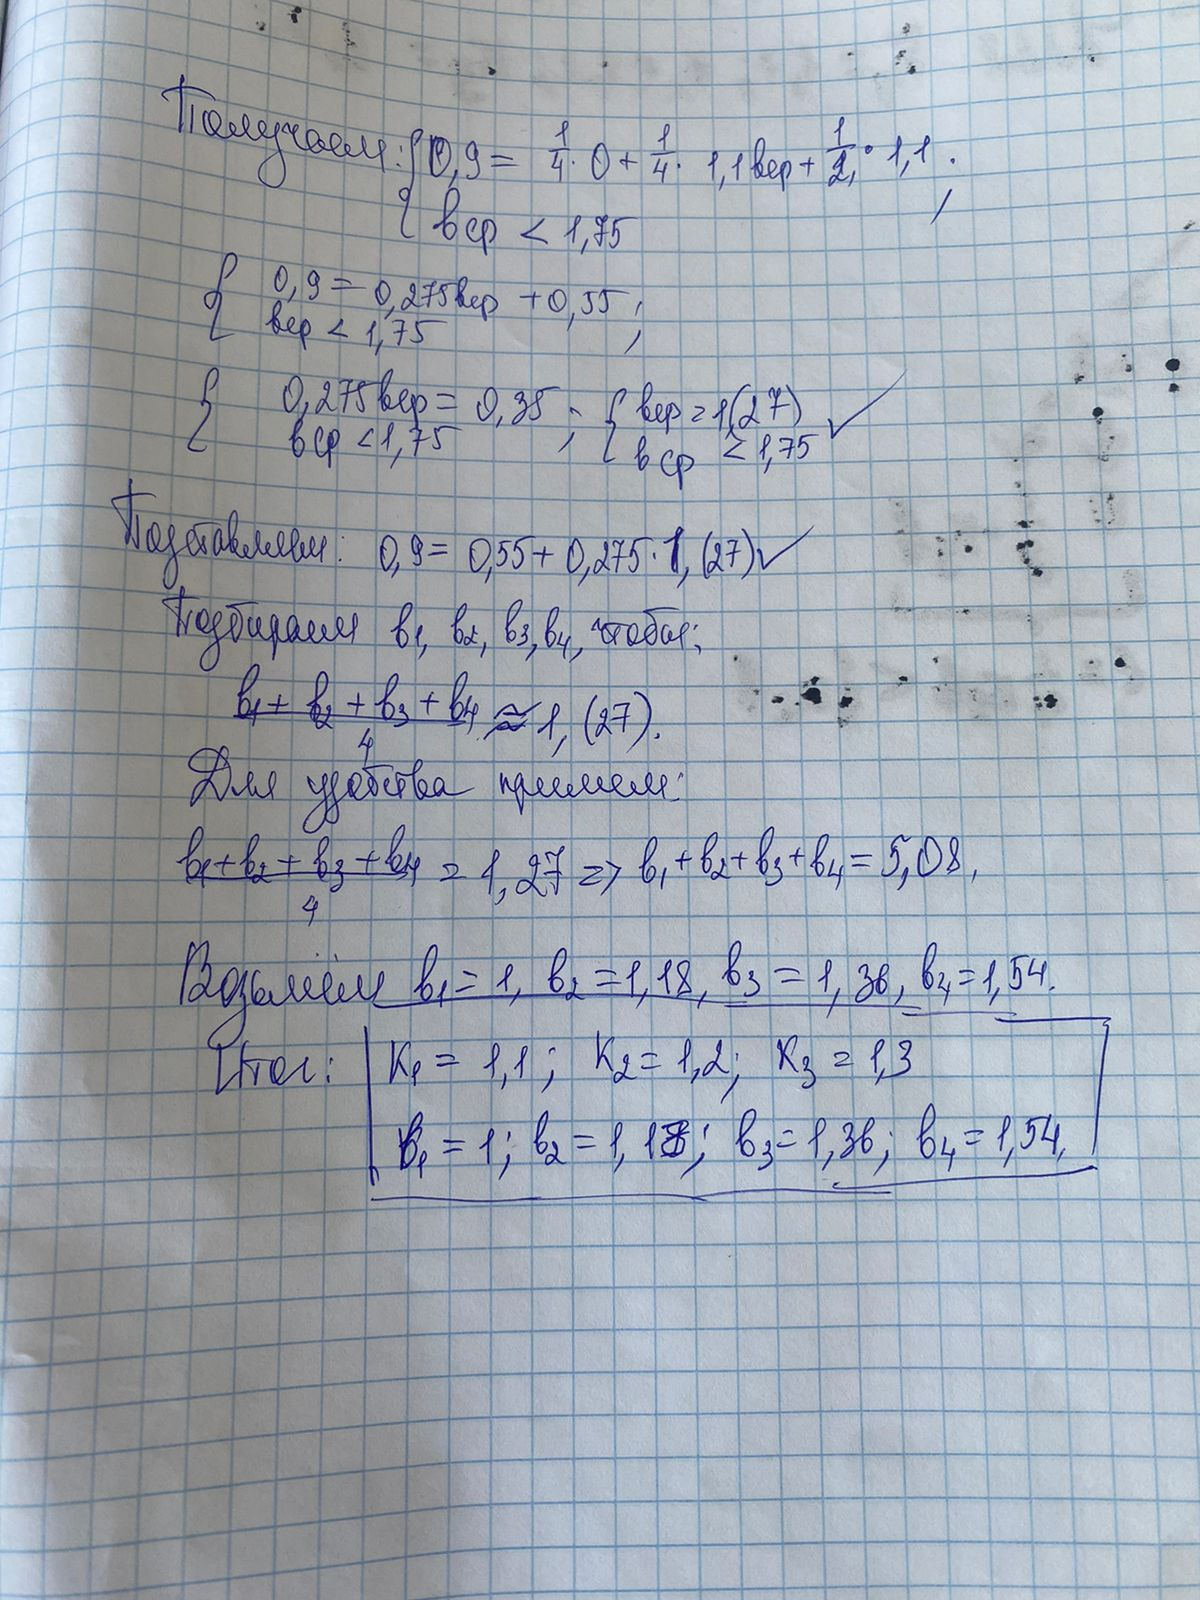

### Теперь возвращаемся к изначальному выражению для нашего матожидания: 0.9 = P(мина) * E(мина) + P(бонус) * E(бонус) + P(обычная) * E(обычная).
### Подставим: 0.9 = 1/4 * 0 + 1/4 * 1.1 * b + 1/2 * 1.1.
### Итого: 0.9 = 0.275 * b + 0.55. Также не забываем, что чтобы это выражение оставалось правдой, мы поставили ограничение по b: оно должно быть менее 1.75.
### Переставим члены, получим 0.275 * b = 0.35, следовательно b = 1.(27), что меньше 1.75. Всё сходится!
### Наконец, чтобы получить конкретные коэффициенты b1, b2, b3 и b4, надо подобрать их так, чтобы они в среднем давали 1.(27).
### Для удобства возьмём не 1.(27), а просто 1.27, убедимся, что наименьший коэффициент не менее 1 и получим 4 равноудалённых b: 1, 1.18, 1.36 и 1.54.
## Таким образом, ответ: **k1 = 1.1, k2 = 1.2, k3 = 1.3, b1 = 1, b2 = 1.18, b3 = 1.36, b4 = 1.54.**

## Теперь проверим на практике. Я реализовал 2 демоверсии, первая где игроки всегда действуют оптимально, выходя на первом ходу при непопадании на мину (для проверки матожидания), а вторая, где игроки принимают решение о выходе/невыходе рандомно.

## Начнём с проверки первой. Если наши расчёты верны, то средний выигрыш составит 0.9$ на игрока, или 900000 долларов в сумме (тут миллион итераций).
## Для запуска кода нажмите на кодовую клетку и нажмите *Shift + Enter*.

In [5]:
import random
def test_sim_optimal(iters):
    win_sum = 0
    k_1 = 1.1
    k_2 = 1.2
    k_3 = 1.3
    b_1 = 1
    b_2 = 1.18
    b_3 = 1.36
    b_4 = 1.54
    for i in range(iters):
        cell = random.choice(['Мина', 'Обычная', 'Бонус', 'Обычная'])
        if cell == 'Мина':
            win_sum += 0
        if cell == 'Обычная':
            win_sum += 1.1
        if cell == 'Бонус':
            bonus = random.choice([b_1, b_2, b_3, b_4])
            win_sum += 1.1*bonus
    return iters, win_sum

iteration_count, win_sum = test_sim_optimal(1000000)
print(f'Итоговый выигрыш игроков: ${round(win_sum)}, в среднем по ${round(win_sum/iteration_count, 2)} на игрока.')
        
    
    

Итоговый выигрыш игроков: $899083, в среднем по $0.9 на игрока.


## Отлично, всё работает как и расчитывалось!
## Теперь посмотрим на более "практичную" версию игры, где на игроков может повлиять азарт, или желание рискнуть.
## Здесь решение о продолжении/непродолжении игры реализовано рандомно, давайте посмотрим на итоговый выигрыш в таком сценарии.
## Для запуска кода нажмите на кодовую клетку и нажмите *Shift + Enter*.

In [7]:
import random

def game(step, cells, bonus, k_list):
    cell = random.choice(cells)
    # Мина = проигрыш
    if cell == 'Мина':
        return 0
    # Обычная клетка
    if cell == 'Обычная':
        cells.remove(cell) ## Убираем одну обычную клетку.
        decision = random.choice(['y', 'n']) ## Рандомно принимается решение: играть дальше, или нет.
        if decision == 'y':
            return game(step+1, cells, bonus, k_list) ## Если да, то запускается повторный цикл, но уже с большим коэффициентом.
        else:
            return k_list[step-1] * bonus ## Если нет, то засчитываем выигрыш и завершаем эту итерацию.
    # Бонусная клетка
    if cell == 'Бонус':
        bonus = random.choice([1, 1.18, 1.36, 1.54]) ## Рандомно вытягиваем бонус.
        cells.remove(cell) ## И убираем бонус, чтоб больше не попадался.
        decision = random.choice(['y', 'n']) ## Рандомное решение.
        if decision == 'y':
            return game(step+1, cells, bonus, k_list) ## Играем дальше.
        else:
            return k_list[step-1] * bonus ## Забираем выигрыш.

def test_sim_random(iters): ## Теперь реализуем основную функцию, которая будет рекурсивно прогонять кучу итераций логики сверху.
    win_sum = 0 ## Итоговый выигрыш.
    k_list = [1.1, 1.2, 1.3] 
    for i in range(iters):
        step = 1 ## Текущий номер шага.
        bonus = 1 ## Текущий бонус. (пока игрок не наступил на бонус, сохраняем его на единице, так как это множитель.)
        cells = ['Обычная', 'Обычная', 'Мина', 'Бонус']
        win_sum += game(step, cells[:], bonus, k_list)  ## Прибавляем к итоговому выигрышу выигрыш каждой отдельной итерации.
    return iters, win_sum

iteration_count, win_sum = test_sim_random(1000000)
print(f'Итоговый выигрыш игроков: ${round(win_sum)}, в среднем по ${round(win_sum/iteration_count, 2)} на игрока.')


Итоговый выигрыш игроков: $677168, в среднем по $0.68 на игрока.


## Таким образом, при "неоптимальной", а сугубо случайной стратегии игроков, средний выигрыш колеблется около 68 центов.